Daily Treasury Yield Curve Rates

Treasury Yield Curve Rates: These rates are commonly referred to as "Constant Maturity Treasury" rates, or CMTs. Yields are interpolated by the Treasury from the daily yield curve. This curve, which relates the yield on a security to its time to maturity is based on the closing market bid yields on actively traded Treasury securities in the over-the-counter market. These market yields are calculated from composites of indicative, bid-side market quotations (not actual transactions) obtained by the Federal Reserve Bank of New York at or near 3:30 PM each trading day. The CMT yield values are read from the yield curve at fixed maturities, currently 1, 2, 3 and 6 months and 1, 2, 3, 5, 7, 10, 20, and 30 years. This method provides a yield for a 10 year maturity, for example, even if no outstanding security has exactly 10 years remaining to maturity.

 <a href='https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yield'>Source</a>

In [99]:
url = 'https://www.treasury.gov/resource-center/data-chart-center/interest-rates/pages/TextView.aspx?data=yieldYear&year=2021'

In [100]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [101]:
df = pd.read_html(url)[1]
df.set_index('Date',inplace=True)

In [102]:
df.head()

,1 mo,2 mo,3 mo,6 mo,1 yr,2 yr,3 yr,5 yr,7 yr,10 yr,20 yr,30 yr
Date,,,,,,,,,,,,
01/04/21,0.09,0.09,0.09,0.09,0.10,0.11,0.16,0.36,0.64,0.93,1.46,1.66
01/05/21,0.08,0.09,0.09,0.09,0.10,0.13,0.17,0.38,0.66,0.96,1.49,1.70
01/06/21,0.09,0.09,0.09,0.09,0.11,0.14,0.20,0.43,0.74,1.04,1.60,1.81
01/07/21,0.09,0.09,0.09,0.09,0.11,0.14,0.22,0.46,0.78,1.08,1.64,1.85
01/08/21,0.08,0.08,0.08,0.09,0.10,0.14,0.24,0.49,0.81,1.13,1.67,1.87


In [103]:
df_chg = df.pct_change().dropna()

In [104]:
df_chg.head()

,1 mo,2 mo,3 mo,6 mo,1 yr,2 yr,3 yr,5 yr,7 yr,10 yr,20 yr,30 yr
Date,,,,,,,,,,,,
01/05/21,-0.111111,0.000000,0.000000,0.000000,0.000000,0.181818,0.062500,0.055556,0.031250,0.032258,0.020548,0.024096
01/06/21,0.125000,0.000000,0.000000,0.000000,0.100000,0.076923,0.176471,0.131579,0.121212,0.083333,0.073826,0.064706
01/07/21,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.069767,0.054054,0.038462,0.025000,0.022099
01/08/21,-0.111111,-0.111111,-0.111111,0.000000,-0.090909,0.000000,0.090909,0.065217,0.038462,0.046296,0.018293,0.010811
01/11/21,0.125000,0.000000,0.000000,0.111111,0.000000,0.000000,-0.083333,0.020408,0.037037,0.017699,0.005988,0.005348


<AxesSubplot:>

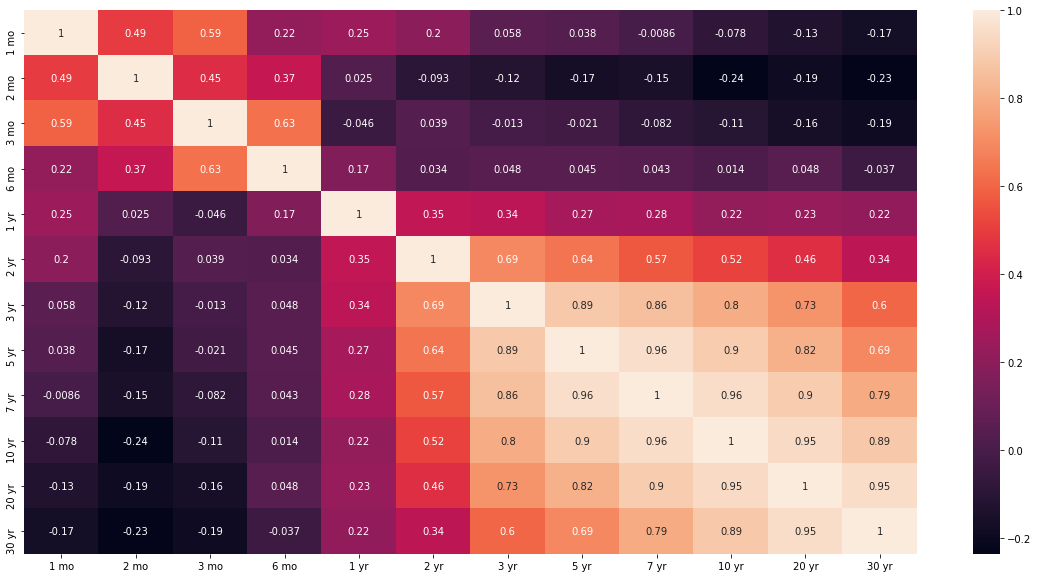

In [105]:
corr = df_chg.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot = True)

In [106]:
import plotly.express as px
fig = px.line(df_chg, x=df_chg.index, y=df_chg.columns,
              
              title='Rates')
fig.show()

In [107]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [135]:
scaler = StandardScaler()
x = scaler.fit_transform(df_chg.values)
pca = PCA(whiten=True)

pca.fit_transform(x)

pca.explained_variance_ratio_.cumsum()

array([0.48108096, 0.68748449, 0.77776783, 0.84492685, 0.9034033 ,
       0.94430063, 0.96961034, 0.98425089, 0.99386987, 0.99703231,
       0.9987403 , 1.        ])

In [136]:
scaler = StandardScaler()
x = scaler.fit_transform(df.values)
pca = PCA(whiten=True)

pca.fit_transform(x)

pca.explained_variance_ratio_.cumsum()

array([0.76240558, 0.95717336, 0.97091433, 0.98216402, 0.99039247,
       0.99392497, 0.99641285, 0.99860541, 0.99971189, 0.99990489,
       0.99996701, 1.        ])

<AxesSubplot:>

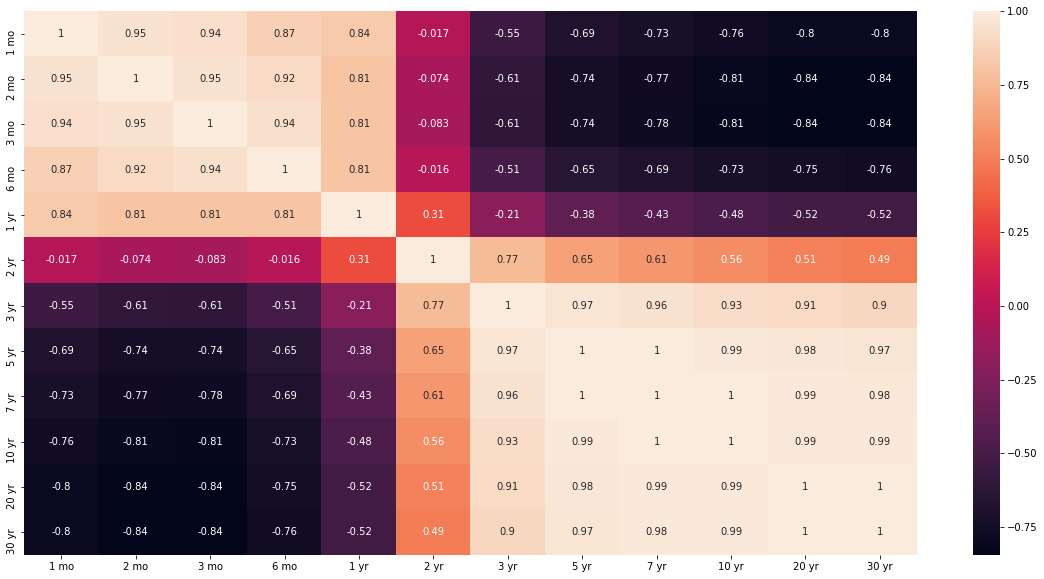

In [155]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

### Change matrix of Yield matrix??

When taking daily yields, These are explained by 3 components for 97% of variance.
As, Compared to 7 components on change matrix

In [164]:
pca = PCA(n_components=3)
pca_recon = pca.fit_transform(x)
print(pca_recon)

[[-5.16408872  0.17695924  0.1540732 ]
 [-4.65213213 -0.46200874  0.40562766]
 [-4.08931698 -1.59774867  0.54296747]
 [-3.72166844 -1.82667666  0.40495015]
 [-2.89597301 -1.4410608   0.1921067 ]
 [-3.13095581 -1.63156654 -0.0771165 ]
 [-3.22279622 -1.94309773  0.27500789]
 [-3.84378201 -2.21587462  0.13092386]
 [-3.07323779 -2.31949737  0.65072462]
 [-3.70250197 -1.15724186 -0.40208943]
 [-3.65950107 -1.51815951 -0.64068258]
 [-3.56894855 -0.89345336 -0.25976664]
 [-3.43310008 -0.87552062 -0.1755691 ]
 [-3.45756922 -0.77269976 -0.38146057]
 [-3.8307583  -0.49907026  0.04616315]
 [-3.1790601   0.85026085 -0.5658689 ]
 [-3.19394146  0.58663443 -0.36840606]
 [-2.62716508  1.05184843 -0.06604788]
 [-2.71979442  0.47197243  0.39423705]
 [-2.86381196  1.16858306 -0.24187873]
 [-2.12528194  1.41544258 -0.55007527]
 [-0.99706325  2.03075367  0.2418429 ]
 [-0.86444008  2.38267021  0.15231788]
 [-0.12031681  3.59446039 -0.14924552]
 [-0.5516427   2.21663098  0.45785292]
 [-0.76290512  2.14445275

In [166]:
eigenvalues = pca.explained_variance_
print(eigenvalues)

[9.30937336 2.3782171  0.16778446]


In [167]:
pca.explained_variance_ratio_.cumsum()

array([0.76240558, 0.95717336, 0.97091433])

In [168]:
eigenvectors = pca.components_
print(eigenvectors)

eigenvectors_df = pd.DataFrame(eigenvectors,columns=df.columns)
eigenvectors_df

[[-0.28937175 -0.30102161 -0.30253324 -0.2795678  -0.21153835  0.1363616
   0.2838812   0.31182798  0.31715046  0.32194986  0.32469016  0.32424908]
 [-0.26656958 -0.23309361 -0.23090078 -0.27679534 -0.46091929 -0.56505215
  -0.32202655 -0.20873153 -0.17454209 -0.13517281 -0.09754027 -0.08617415]
 [ 0.29509742 -0.0421789  -0.22383572 -0.7464885   0.12168     0.43470723
  -0.07018502 -0.10102676 -0.12331355 -0.12320954 -0.17102872 -0.15888534]]


,1 mo,2 mo,3 mo,6 mo,1 yr,2 yr,3 yr,5 yr,7 yr,10 yr,20 yr,30 yr
0,-0.289372,-0.301022,-0.302533,-0.279568,-0.211538,0.136362,0.283881,0.311828,0.317150,0.321950,0.324690,0.324249
1,-0.266570,-0.233094,-0.230901,-0.276795,-0.460919,-0.565052,-0.322027,-0.208732,-0.174542,-0.135173,-0.097540,-0.086174
2,0.295097,-0.042179,-0.223836,-0.746489,0.121680,0.434707,-0.070185,-0.101027,-0.123314,-0.123210,-0.171029,-0.158885


In [169]:
print(eigenvalues)

[9.30937336 2.3782171  0.16778446]


In [170]:
eigenvectors_df.index = ['EV1','EV2','EV3']

<AxesSubplot:>

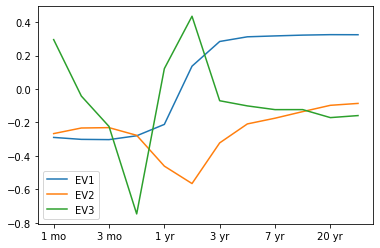

In [171]:
eigenvectors_df.T.plot()

In [172]:
#Projection Space, same as 
x.dot(eigenvectors_df.T)

array([[-5.16408872,  0.17695924,  0.1540732 ],
       [-4.65213213, -0.46200874,  0.40562766],
       [-4.08931698, -1.59774867,  0.54296747],
       [-3.72166844, -1.82667666,  0.40495015],
       [-2.89597301, -1.4410608 ,  0.1921067 ],
       [-3.13095581, -1.63156654, -0.0771165 ],
       [-3.22279622, -1.94309773,  0.27500789],
       [-3.84378201, -2.21587462,  0.13092386],
       [-3.07323779, -2.31949737,  0.65072462],
       [-3.70250197, -1.15724186, -0.40208943],
       [-3.65950107, -1.51815951, -0.64068258],
       [-3.56894855, -0.89345336, -0.25976664],
       [-3.43310008, -0.87552062, -0.1755691 ],
       [-3.45756922, -0.77269976, -0.38146057],
       [-3.8307583 , -0.49907026,  0.04616315],
       [-3.1790601 ,  0.85026085, -0.5658689 ],
       [-3.19394146,  0.58663443, -0.36840606],
       [-2.62716508,  1.05184843, -0.06604788],
       [-2.71979442,  0.47197243,  0.39423705],
       [-2.86381196,  1.16858306, -0.24187873],
       [-2.12528194,  1.41544258, -0.550